In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ab_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [74]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [4]:
df.isnull().any()
#there is no Null values

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [6]:
(df[df['group']=='treatment']['landing_page']!='new_page').sum()+(df[df['landing_page']=='new_page']['group']!='treatment').sum()
#data includes 'treatment' users with the 'landing_page' = 'old_page'
#and vice versa, 'control' users with the 'landing_page' = 'new_page'

3893

In [9]:
#cleaning the above point
ds=df.query('group=="treatment" and landing_page!="new_page"')
ds=ds.append(df.query('group!="treatment" and landing_page=="new_page"'))
df2=df.drop(ds.index)
(df2[df2['group']=='treatment']['landing_page']!='new_page').sum()+(df2[df2['group']!='treatment']['landing_page']=='new_page').sum()

0

In [10]:
df2.shape

(290585, 5)

In [11]:
df2['user_id'].nunique()
#there is a duplication in the user_id values

290584

In [12]:
df4=df2['user_id'].value_counts()
df4[df4>1].index

Int64Index([773192], dtype='int64')

In [13]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
#cleaning the above point
df2=df2.drop(index=1899)
df2['user_id'].value_counts().nunique()

1

### Hypothesis Testing

In [16]:
p_old=df2['converted'].mean()
p_new=df2['converted'].mean()
n_new=len(df2[df2['group']=='treatment'])
n_old=len(df2[df2['group']=='control'])

In [17]:
p_diffs=[]
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
new_converted_simulation, old_converted_simulation

(array([0.1190971 , 0.1200468 , 0.11936549, ..., 0.1198197 , 0.12009497,
        0.12003991]),
 array([0.12027617, 0.12057216, 0.1197186 , ..., 0.11933312, 0.1195534 ,
        0.11889946]))

(array([   5.,   73.,  445., 1633., 3055., 2882., 1440.,  407.,   55.,
           5.]),
 array([-4.94375491e-03, -3.94577316e-03, -2.94779142e-03, -1.94980968e-03,
        -9.51827936e-04,  4.61538062e-05,  1.04413555e-03,  2.04211729e-03,
         3.04009903e-03,  4.03808078e-03,  5.03606252e-03]),
 <BarContainer object of 10 artists>)

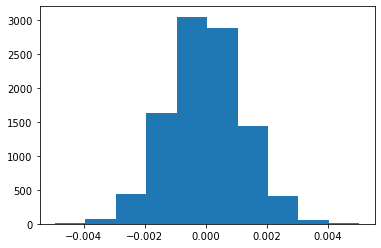

In [23]:
p_diffs = new_converted_simulation - old_converted_simulation
plt.hist(p_diffs)

In [31]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
(p_diffs > obs_diff).mean()

0.9105

Probability = 91% which is > α, so alternative hypothesis is rejected and Null hypothesis is approved